# Notebook to present augmentation 

In [1]:
import Augmentor
from siamese.dataset import DataLoader
from siamese.dataset import Dataset
from extensies import augmentation as aug
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import skimage.feature as ft
import albumentations
import tensorflow as tf
from imgaug import augmenters as iaa
from sklearn.model_selection import KFold

## Load data

In [11]:
modalities = ['adc/t/40x40x1']
if len(modalities) > 1:
    loader = DataLoader('../../data/',modalities)
    loader.load_data()
    loader.combine_channels(modalities)
    X_train, X_test, y_train, y_test = loader.get_train_test('combined')

else:
    loader = DataLoader('../../data/',modalities)
    loader.load_data()
    X_train, X_test, y_train, y_test = loader.get_train_test(modalities[0])
len(X_train)

207

In [12]:
X_train.shape

(207, 40, 40, 1)

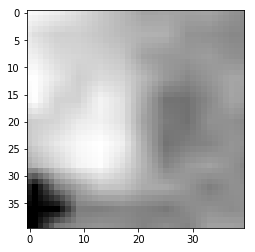

In [13]:
plt.imshow(X_train[0,:,:,0],cmap = 'gray')

## Dataset object with added augmentation to output

In [5]:
dataset = Dataset()
dataset.images_train = X_train
dataset.images_test = X_test
dataset.labels_train = y_train
dataset.labels_test = y_test

In [6]:
augs = aug.ClassicAugmentor(X_train)
x,y,z = dataset.get_siamese_batch(4,augmentor = augs)
print('Shapes: ',x.shape,y.shape,z.shape)

Shapes:  (4, 40, 40, 1) (4, 40, 40, 1) (4, 1)


# 1. own augmentation classes

In [7]:
augmentor = aug.Elastic2Augmentor(X_train)
X,y = augmentor.generate_images(X_train[:100],y_train[:100],1000)

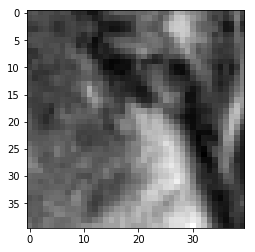

In [12]:
plt.imshow(X[9,:,:,0],cmap = 'gray')

# 2. Albumentations

Augmentation with Albumentations library https://github.com/albu/albumentations

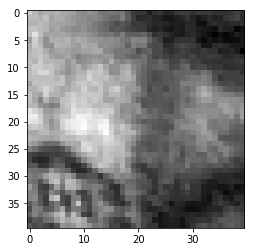

In [16]:
# aug = albumentations.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0, rotate_limit=20, p=1)
# aug = albumentations.HorizontalFlip(p=1)
# aug = albumentations.ShiftScaleRotate(p=1)
aug = albumentations.Compose([
#         albumentations.HorizontalFlip(p=0.5),
#         albumentations.RandomRotate90(p = 1),
#         albumentations.Rotate(p = 1),
#         albumentations.ShiftScaleRotate(shift_limit=0, scale_limit=0.1, rotate_limit=20, p=1)
    albumentations.augmentations.transforms.ElasticTransform(alpha=1, sigma=20, alpha_affine=3, 
                                                             interpolation=1, border_mode=4, 
                                                             always_apply=False, approximate=False, p=1)
    ], p=1)
image = aug(image=X_train[0])['image']
plt.imshow(image[:,:,0],cmap = 'gray')

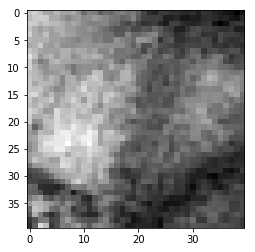

In [17]:
plt.imshow(X_train[0,:,:,0],cmap = 'gray')

# 3. imgaug

Augmentation with imgaug library
https://github.com/aleju/imgaug

In [22]:
seg = iaa.Sequential([
   iaa.ElasticTransformation(sigma=8,alpha = 20),
#     iaa.PiecewiseAffine(scale = 0.05,nb_rows=4, nb_cols=4,mode="symetric"),
])

X = seg.augment_image(X_train[0])

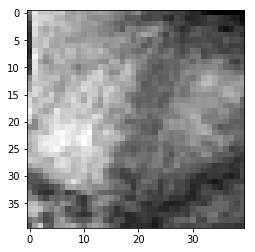

In [23]:
plt.imshow(X[:,:,0],cmap = 'gray')

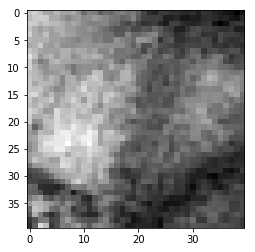

In [25]:
plt.imshow(X_train[0,:,:,0],cmap = 'gray')

Text(0.5, 1.0, 'Histogram with augmented image')

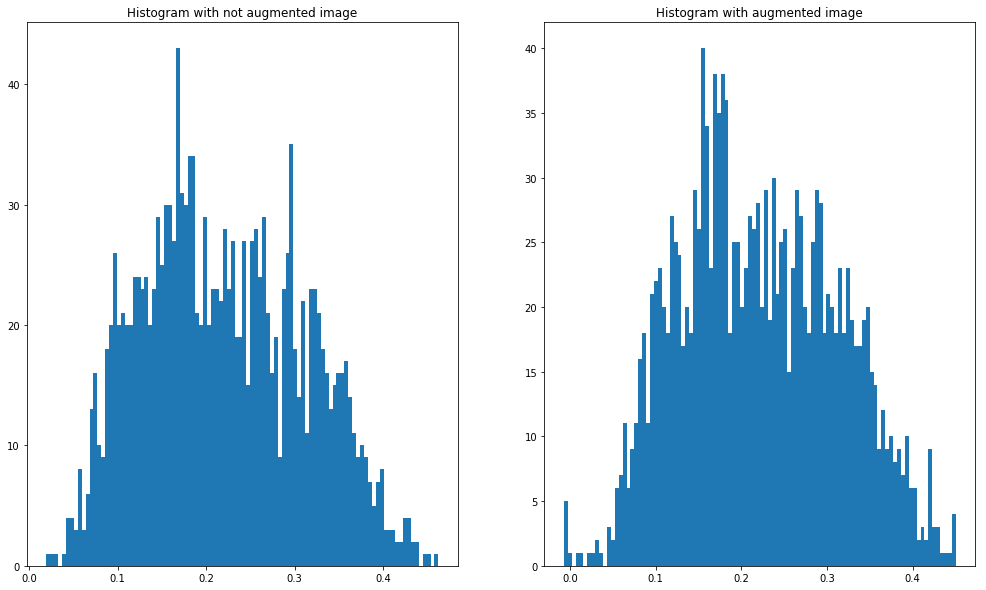

In [28]:
fig = plt.figure(figsize = (17,10))
spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

f2_ax1 = fig.add_subplot(spec2[0, 0])
f2_ax2 = fig.add_subplot(spec2[0, 1])

f2_ax1.hist(X_train[0].flatten(),bins = 100)
f2_ax1.set_title("Histogram with not augmented image")

f2_ax2.hist(X.flatten(),bins = 100)
f2_ax2.set_title("Histogram with augmented image")